## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mexico_housing.csv")
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


## Data Preprocessing & Feature Engineering

In [4]:
# drop irrelevant features

df = df.drop(["lat", "lon"], axis=1)

# Encode categorical variables
le = LabelEncoder()
df['property_type'] = le.fit_transform(df['property_type'])
df['state'] = le.fit_transform(df['state'])

df.head()

,property_type,state,area_m2,price_usd
0,1,9,150,67965.56
1,1,16,186,63223.78
2,0,11,82,84298.37
3,0,11,150,94308.80
4,1,28,205,105191.37


In [5]:
df["property_type"].unique()

array([1, 0])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   int32  
 1   state          1736 non-null   int32  
 2   area_m2        1736 non-null   int64  
 3   price_usd      1736 non-null   float64
dtypes: float64(1), int32(2), int64(1)
memory usage: 40.8 KB


## Model Training

In [7]:
# Split the data into training and testing sets
X = df.drop("price_usd", axis=1)
y = df['price_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Evaluation

In [8]:
# Evaluate the model
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print('Test RMSE:', rmse)
print('Test R-squared:', r2)

Test RMSE: 49295.53915864424
Test R-squared: 0.46951719482890053


## Feature Importance

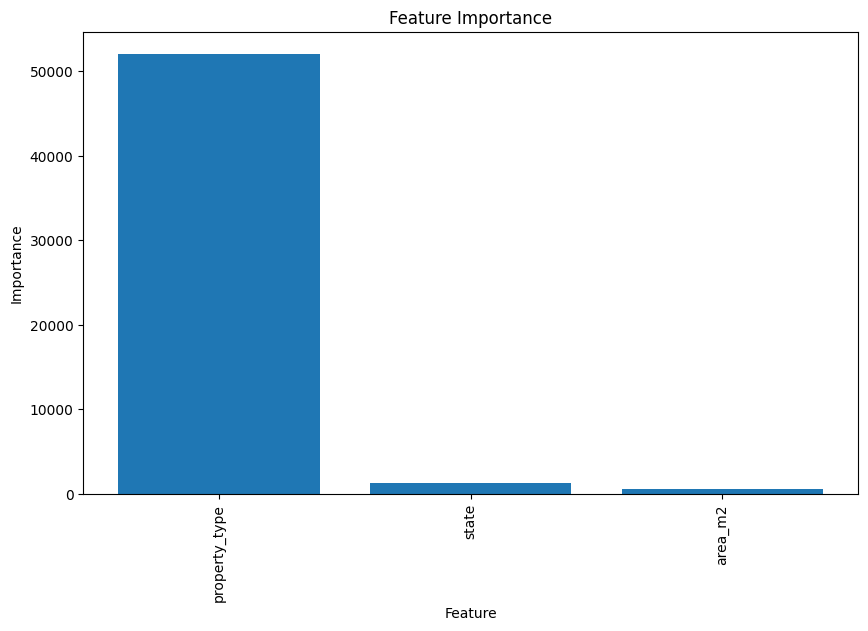

In [9]:
# Feature importance
feature_importance = np.abs(model.coef_)
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importance[sorted_idx])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [10]:
# Keep the top 3 features
top_k = 3

# Get the column names based on feature importance
selected_features = [X.columns[i] for i in sorted_idx[:top_k]]

print(f"Important Features - {selected_features}")
X_select = X[selected_features]
X_select.head()

Important Features - ['property_type', 'state', 'area_m2']


,property_type,state,area_m2
0,1,9,150
1,1,16,186
2,0,11,82
3,0,11,150
4,1,28,205


In [11]:
# Retrain the model with the reduced feature set
X_new = X_select
y_new = y
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Evaluate the reduced feature model

y_pred_new = model.predict(X_test)

rmse_new = np.sqrt(mean_squared_error(y_test, y_pred_new))
r2_new = r2_score(y_test, y_pred_new)


print('Test RMSE:', rmse_new)
print('Test R-squared:', r2_new)

Test RMSE: 49295.53915864424
Test R-squared: 0.46951719482890053
